This is my gradient descent implementation for assignment 1 of the CS 164 at Minerva schools.

In [3]:
import math
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import sympy

def f(b, theta):
    return (2*b+(3-b)*np.cos(theta))*(3-b)*np.sin(theta)/4


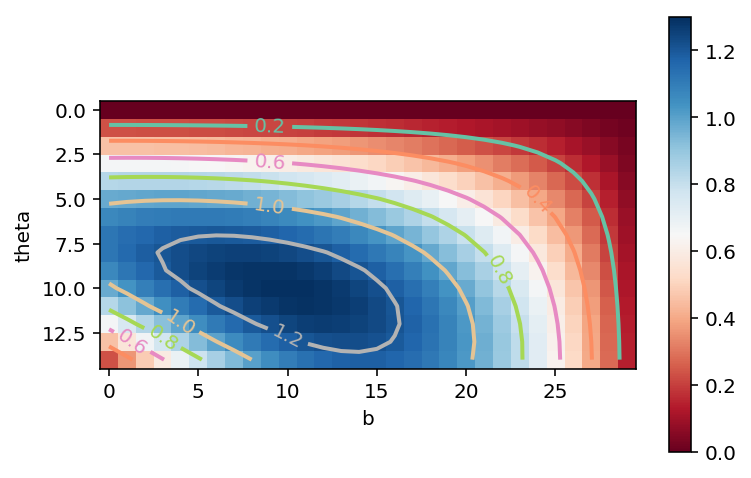

In [6]:
# contour
from numpy import exp,arange
from matplotlib.pyplot import xlabel, ylabel, xlim, ylim,contourf
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

def z_func(x,y):
    return (2*x+(3-x)*np.cos(y))*(3-x)*np.sin(y)/4
 
x = arange(0.0,3.0,0.1)
y = arange(0,math.pi/2,math.pi/30)
X,Y = meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid

im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
xlabel('b')
ylabel('theta')
colorbar(im) # adding the colobar on the right
show()


In [7]:
from sympy import symbols, diff, cos, sin, N
import numpy as np

W = 3 # 2a+b=W=3
tol = 1e-5 # tolerance value
noise = 1e-7 # noise to escape the saddle point

def gradient_descent(f, diff_x, diff_y, start, f_prev, n, path):
    step = linesearch(start, diff_x, diff_y) # calculate optimal step size using line search
    start[b] += step*(N(diff_x.subs(start))) - noise
    start[theta] += step*(N(diff_y.subs(start))) + noise 
    
    if round(N(f.subs(start)),7) == round(f_prev, 7) and n > 50: # condition for algorithm to terminate
        return N(f.subs(start)), start, path
    
    f_prev = N(f.subs(start))
    path.append((start[b], start[theta]))
    n += 1
    
    return gradient_descent(f, diff_x, diff_y, start, f_prev, n, path) # recursion

def linesearch(start, diff_x, diff_y):
    global b, theta, alpha, b_alpha, theta_alpha, f_alpha
    
    l = noise
    h = start[alpha]
    mid = (l+h)/2
    
    b_alpha = diff_b*alpha
    theta_alpha = diff_theta*alpha

    for _ in range(100):
        res = diff(f_alpha, alpha).subs({alpha:h, b: start[b], theta: start[theta]})
        if res <= TOL:
            return mid
        if res < 0:
            h *= 2
        if res > 0:
            mid = l + h
            if mid <= 0:
                l = mid
            else:
                h = mid
    return mid

# function f(b, theta) for the cross sectional area
b, theta, alpha = symbols('b theta alpha', real = True)
f = (2*b+(3-b)*cos(theta))*(3-b)*sin(theta)/4

# function h'(a) for line search
b_alpha, theta_alpha = symbols('b_alpha theta_alpha', real = True)
f_alpha = (3-b_alpha)*sin(theta_alpha)*(2*b_alpha+3*cos(theta_alpha)-b_alpha*cos(theta_alpha))*0.25

# partial derivatives wrt to b and theta
diff_b = diff(f, b)
diff_theta = diff(f,theta)

# initial state
start = {alpha:1, b:3, theta:0}

# search result
res = gradient_descent(f, diff_b, diff_theta, start, N(f.subs(start)), 0, [(start[b], start[theta])])

# print out result
print("Optimum point:    %f" %res[0])
print("Error: %f" %(3*np.sqrt(3)/4 - res[0])) # based on our analytical solution
print("At values:  ", res[1])

Optimum point:    1.299038
Error: 0.000000
At values:   {theta: 1.04728091405733, b: 1.00030760085211, alpha: 1}
